In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
# Import libraries
import pandas as pd
from google.colab import files

In [12]:
# Upload the dataset
uploaded = files.upload()

Saving odi_Matches_Data.csv to odi_Matches_Data (1).csv


In [13]:
# Load the dataset into a DataFrame
df = pd.read_csv('odi_Matches_Data.csv')

In [14]:
# Display the first few rows to confirm loading
df.head()

,ODI Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,488,65425,Australia Vs New Zealand 4Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-07,ODI,2.0,Australia,1572.0,...,RC Bailhache,NaN,Australia,bat,Australia,Australia won by 6 runs,1795.0,"['1767', '1793', '1754', '1572', '1871', '1795...","['1550', '1863', '1861', '1669', '1698', '1846...",[]
1,492,65428,New Zealand Vs Sri Lanka 7Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-12,ODI,5.0,New Zealand,1698.0,...,SG Randell,NaN,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 4 wickets (with 21 balls rema...,1810.0,"['1777', '1550', '1698', '1669', '1861', '1846...","['1810', '1864', '1789', '1762', '1666', '1664...",[]
2,495,65431,Australia Vs New Zealand 10Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-17,ODI,5.0,New Zealand,1698.0,...,AR Crafter,NaN,Australia,bowl,Australia,Australia won by 5 wickets (with 64 balls rema...,1795.0,"['1550', '1863', '1698', '1669', '1407', '1790...","['1793', '1767', '1773', '1754', '1871', '1795...",['1790']
3,496,65432,Australia Vs Sri Lanka 11Th Match,60879.0,"Benson & Hedges World Series Cup Australia, Ne...",1988-01-19,ODI,8.0,Sri Lanka,1664.0,...,TA Prue,NaN,Australia,bowl,Australia,Australia won by 3 wickets (with 3 balls remai...,1871.0,"['1810', '1864', '1789', '1753', '1762', '1666...","['1767', '1793', '1754', '1871', '1795', '1572...",['1753']
4,508,64326,New Zealand Vs England 3Rd Odi,60882.0,England tour of New Zealand - 1988 (1987/88),1988-03-16,ODI,1.0,England,1543.0,...,SJ Woodward,NaN,New Zealand,bowl,New Zealand,New Zealand won by 7 wickets (with 21 balls re...,1550.0,"['1758', '1629', '1770', '1850', '1543', '1865...","['1550', '1883', '1863', '1882', '1777', '1918...",['1883']


In [15]:
# Import preprocessing tools
from sklearn.preprocessing import LabelEncoder

In [16]:
# Select relevant columns
columns_to_keep = ['Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Team1 Name', 'Team2 Name',
                   'Team1 Runs Scored', 'Team2 Runs Scored', 'Match Venue (Stadium)']
df = df[columns_to_keep].copy()

In [17]:
# Handle missing values (drop rows with missing critical data)
df.dropna(subset=['Toss Winner', 'Toss Winner Choice', 'Match Winner'], inplace=True)

In [18]:
# Create target variable: 1 if toss winner won the match, 0 otherwise
df['Toss Winner Won Match'] = (df['Toss Winner'] == df['Match Winner']).astype(int)

In [19]:
# Encode categorical variables
le_toss_winner = LabelEncoder()
le_toss_choice = LabelEncoder()
le_team1 = LabelEncoder()
le_team2 = LabelEncoder()
le_venue = LabelEncoder()

df['Toss Winner'] = le_toss_winner.fit_transform(df['Toss Winner'])
df['Toss Winner Choice'] = le_toss_choice.fit_transform(df['Toss Winner Choice'])
df['Team1 Name'] = le_team1.fit_transform(df['Team1 Name'])
df['Team2 Name'] = le_team2.fit_transform(df['Team2 Name'])
df['Match Venue (Stadium)'] = le_venue.fit_transform(df['Match Venue (Stadium)'])

In [20]:
# Features and target
X = df[['Toss Winner', 'Toss Winner Choice', 'Team1 Name', 'Team2 Name',
        'Team1 Runs Scored', 'Team2 Runs Scored', 'Match Venue (Stadium)']]
y = df['Toss Winner Won Match']

In [21]:
# Display preprocessed data
print("Preprocessed Data Sample:")
print(X.head())
print("\nTarget Sample:")
print(y.head())

Preprocessed Data Sample:
   Toss Winner  Toss Winner Choice  Team1 Name  Team2 Name  Team1 Runs Scored  \
0            2                   0           3          18              216.0   
1           23                   1          18          24              199.0   
2            2                   1          18           3              176.0   
3            2                   1          24           3              188.0   
4           17                   1           8          18              219.0   

   Team2 Runs Scored  Match Venue (Stadium)  
0              210.0                    129  
1              200.0                     23  
2              177.0                     33  
3              189.0                    215  
4              223.0                    128  

Target Sample:
0    1
1    1
2    1
3    1
4    1
Name: Toss Winner Won Match, dtype: int64


In [22]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Percentage of matches won by toss winner
toss_win_rate = y.mean() * 100
print(f"Percentage of matches won by toss winner: {toss_win_rate:.2f}%")

Percentage of matches won by toss winner: 50.34%


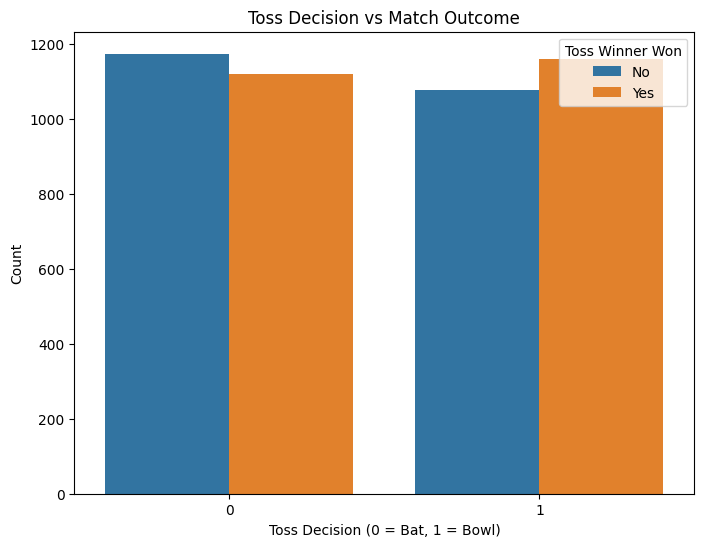

In [24]:
# Bar plot: Toss decision vs. match outcome
plt.figure(figsize=(8, 6))
sns.countplot(x='Toss Winner Choice', hue='Toss Winner Won Match', data=df)
plt.title('Toss Decision vs Match Outcome')
plt.xlabel('Toss Decision (0 = Bat, 1 = Bowl)')
plt.ylabel('Count')
plt.legend(title='Toss Winner Won', labels=['No', 'Yes'])
plt.show()

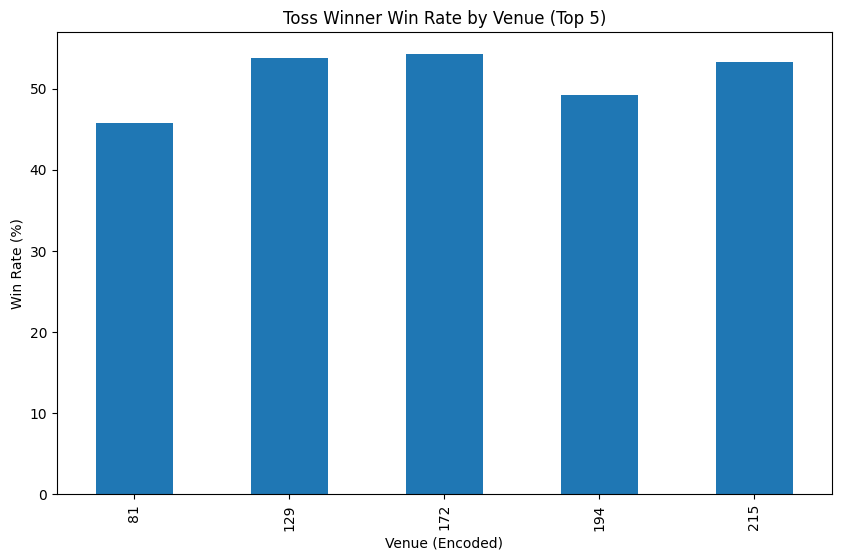

In [25]:
# Venue-based win rate (top 5 venues)
top_venues = df['Match Venue (Stadium)'].value_counts().index[:5]
venue_win_rates = df[df['Match Venue (Stadium)'].isin(top_venues)].groupby('Match Venue (Stadium)')['Toss Winner Won Match'].mean() * 100
plt.figure(figsize=(10, 6))
venue_win_rates.plot(kind='bar')
plt.title('Toss Winner Win Rate by Venue (Top 5)')
plt.xlabel('Venue (Encoded)')
plt.ylabel('Win Rate (%)')
plt.show()

In [26]:
# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Results:
Accuracy: 0.86
Precision: 0.86
Recall: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       452
           1       0.86      0.87      0.86       455

    accuracy                           0.86       907
   macro avg       0.86      0.86      0.86       907
weighted avg       0.86      0.86      0.86       907



In [31]:
# Import joblib for saving models
import joblib

In [32]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [34]:
#Save the label encoders
joblib.dump(le_toss_winner, 'le_toss_winner.pkl')
joblib.dump(le_toss_choice, 'le_toss_choice.pkl')
joblib.dump(le_team1, 'le_team1.pkl')
joblib.dump(le_team2, 'le_team2.pkl')
joblib.dump(le_venue, 'le_venue.pkl')

print("Model and encoders saved successfully!")

Model and encoders saved successfully!


In [33]:
# Save the preprocessed DataFrame to a CSV file
df.to_csv('preprocessed_odi_matches.csv', index=False)

print("Preprocessed dataset saved as 'preprocessed_odi_matches.csv'!")

Preprocessed dataset saved as 'preprocessed_odi_matches.csv'!


In [ ]:
# Download the saved files
files.download('random_forest_model.pkl')
files.download('le_toss_winner.pkl')
files.download('le_toss_choice.pkl')
files.download('le_team1.pkl')
files.download('le_team2.pkl')
files.download('le_venue.pkl')
files.download('preprocessed_odi_matches.csv')

print("All files downloaded successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files downloaded successfully!


# Streamlit